In [1]:
"""
Lets dive into the basic of tensorflow and how to implement neural nets!

Reference: 
Google Cloud Tensorflow tutorial: 
- https://cloud.google.com/blog/big-data/2017/01/learn-tensorflow-and-deep-learning-without-a-phd

Slides
- https://docs.google.com/presentation/d/1TVixw6ItiZ8igjp6U17tcgoFrLSaHWQmMOwjlgQY9co/pub?slide=id.p

Video: 
https://www.youtube.com/watch?v=qyvlt7kiQoI&feature=youtu.be
"""

C:\Users\Darshil\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<h1> Very Simple Model: Softmax Classification </h1> 
Here we cover begin covering =the basics of the MNIST dataset and softmax classification

Recall that softmax classification is done as follows. 
1. ZL = WL * A(l-1) * BL  
2. Exponent of vector ZL 
3. Each value in vector/ total absolute value in vector  - this gives probabilities that the example is each class 
 
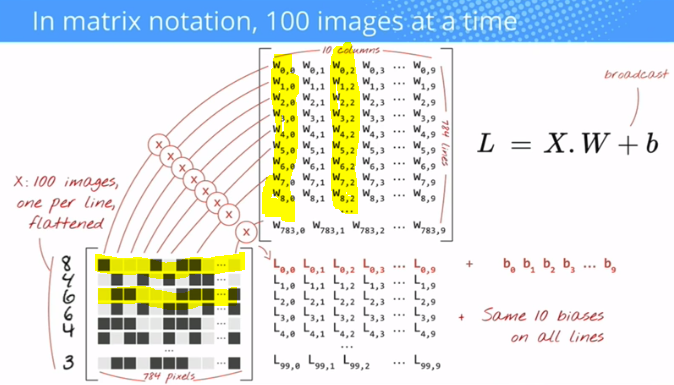

<h2> Matrix Notation- 100 images </h2> '

Here we go over the formula for mutliplyig training data with the weights and biases. Note how here we do not transpose the training data (like we learned in Andrew Ng's course) - lets explore 

So here dimensions are as follows: 
Training data : m, A0
Weights for hidden layers: Al-1, hidden layer 1 


<h2> Softmax formula concept defined </h2>

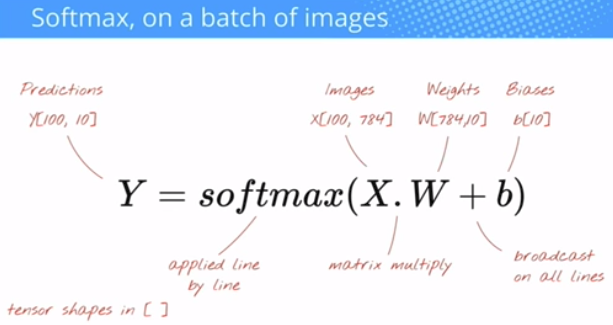

<h2> Define loss function </h2> 
Note here that although you could use different loss funcitons (mean squared errors, euclidean distances etc), for classification it is best to use the log formula one


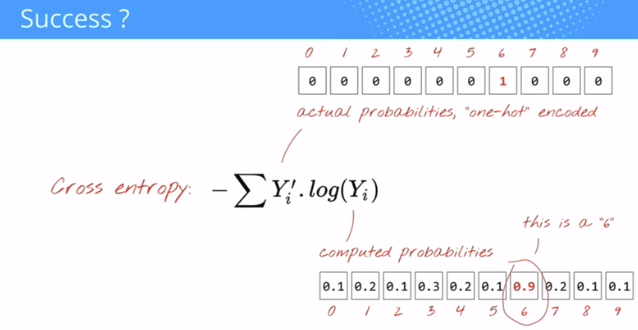

<h2> Lets peek into the transformation of value of various metrics during training</h2> 

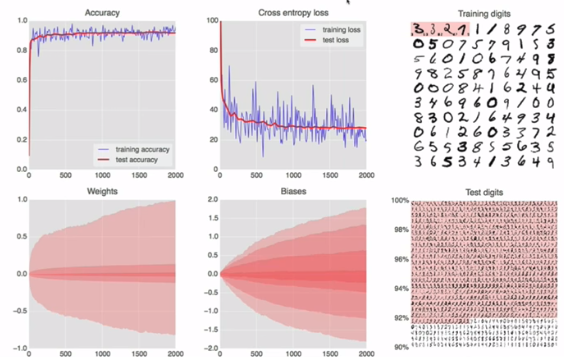

In [11]:
# Lets begin coding this up!
import tensorflow as tf

# Set Variables and initialize them!
X = tf.placeholder(tf.float32, [None, 28,28,1])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable (tf.zeros([10]))
init = tf.initialize_all_variables()
"""
Placeholder
- Remember that we define the placeholder data which represents the dimensions of the data we intend to pass through it 

init
- init: You always have to initialize the variables or it doesn't return anything! (use global.variables.initializer instead)

X
-Note here how we've indicated [None, 28,28,1] where None allows for m examples, 28x28 are the image dimensions containing
...pixels and lastly the 1 refers to the number of values per pixel (3 for color, 1 for black & white)"""


#model - here we reshape X matrix and define the forward propagation model 
Y = tf.nn.softmax(tf.matmul(tf.reshape(X,[-1,784]),W)+b)
# define output layer size for real labels
Y_ = tf.placeholder(tf.float32, [None, 10])
"""
Reshape
It is important to understand the concept of reshaping. What we've really done is take the 28 x 28 and put that into one vector. 
Recall its first row , second row and so on stacked on top of another and it keeps going
The -1 means there is only one solution figure it out - so then 28x28 

Y_ = correct answers or real labels
Although Y in this case is simply the entire forward propagation function. Could be confused with Y_, where Y_ in 
...this case is a placeholder for the real Y values 

Y
Also note, the output of Y in this case are the predictions. It is layer AL! We apply linear-> Softmax classification 
Dimensions: 
- Transposed input data in - output: L, m matrix where L = 10 
- Non-transposed data: - output: m, L where L = 10 
"""

# Now lets define our cost function- remeber we use the log formula for a classification model 
cross_entropy = -tf.reduce_sum(Y_* tf.log(Y))
# % of correct answers found in batch
is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
"""
argmax
Remember what argmax does is simply return the position of the largest value in an array. 
Quick read to understand this concept better: https://www.michaelburge.us/2017/07/18/how-to-use-argmax-in-tensorflow.html

is_correct
So since the output (not dimensions fo weights) is of shape 10,m if input is transposed or m,10 : 
...the output vector s are compared for Y, Y_
"""


#now we optimize using Gradient Descent 
optimizer = tf.train.GradientDescentOptimizer(0.003)
train_step = optimizer.minimize(cross_entropy)
"""
optimizer
Tensorflow provides a wide range of optimization algorithm support, we use gradient descent. There's Adams optimizer for instance
learnign rate = 0.003 here, default is 0.05 I think

train_step
This part simply takes the gradient descent algorihtm and applies it to our cost function, thus seeking to minimize it and 
...adusjust parameters accordingly 
"""


# run session
sess = tf.Session()
sess.run(init)

for i in range(1000):
    # split data into mini-batches
    batch_x , batch_y = mnist.train.next_batch(100)
    train_data = {X:batch_x, Y: batch_y}
    """
    range loop
    Note that this range represents the number of gradient steps. Recall how we learned in Andrew Ng's course that
    mini-batch gradient descent works as follow. Each mini-batch is technically the training data for that step and for 
    each batch we simply take 1 gradient descent step. So now we that over 1000 times and go over 1000 batches each of size 100
    
    batch_x, batch_y, train_data
    Important to understand this step. First we take our mnist.train data and then we split it into bacthes of 100s 
    The from that data we specify what is X and what is Y before passing it through the train_step below
    """
    
    
    #train
    sess.run(train_step, feed_dict =train_data)
    #perform gradient descent step
    a,c = sess.run([accuracy, cross_entropy], feed_dict = train_data)
    
    
    # success on test data
    test_data = {X: minst.test.images, Y_ : minst.test.labels}
    a,c = sess.run([accuracy, cross_entropy], feed = test_data)                

NameError: name 'mnist' is not defined

<h2> Here is the full code to implement a neural network </h2> 

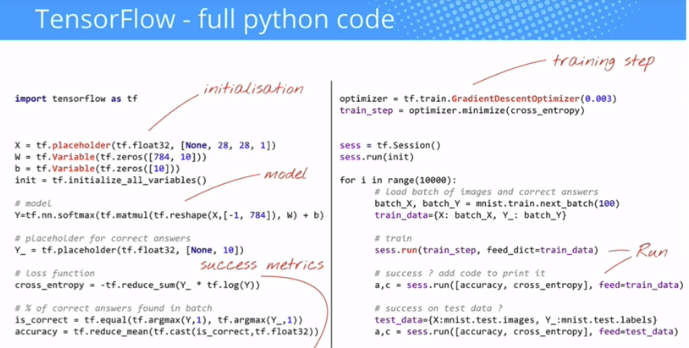

<h1> Deep Learning- Adding Hidden Layers to your neural net </h1>

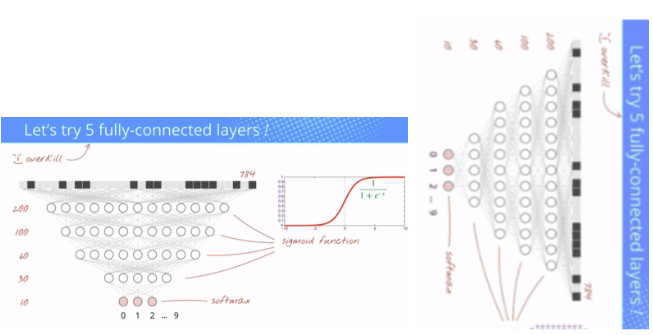


<h5>Here we see the computation graph for a deep neural network. </h5>

- Image 1: We see a non-input transposed version of the flow 
- Image 2: An input transposed version of the flow 

<h5>Furthermore, the non-linear activation funcitons used here are as follows: </h5>
- Linear -> Sigmoid * L-1
- Linear -> Softmax *L

In [18]:
# Lets begin implementing our deep neural net!

# Determine number of nodes in each hidden layer (& consequentially the number of hidden layers)
K = 200
L = 100
M = 60
N = 30
"""
Does not include the output layer
"""

# Lets initialize weights for each layer including the output layer 
W1 = tf.Variable(tf.truncated_normal([28*28,K], stddev = 0.1))
B1 = tf.Variable(tf.zeros([K]))

W2 = tf.Variable(tf.truncated_normal([K,L], stddev = 0.1))
B2 = tf.Variable(tf.zeros([L]))

W3 = tf.Variable(tf.truncated_normal([L,M], stddev = 0.1))
B3 = tf.Variable(tf.zeros([M]))

W4 = tf.Variable(tf.truncated_normal([M,N], stddev = 0.1))
B4 = tf.Variable(tf.zeros([N]))

W5 = tf.Variable(tf.truncated_normal([N,10], stddev = 0.1))
B5 = tf.Variable(tf.zeros([10]))
"""
truncated_normal
Note that here we use truncated_normal to simply get small random values   

zeros
For now we simply zero out the constants (b) for each layer

dimensions
Again note that we've learned l, l-1 for dimensions, just reverse that! or imaginatively flip the computation graph
"""

# define X
X = tf.reshape(X, [-1, 28*28])  
# define Als till L
Y1 = tf.sigmoid(tf.matmul(X, W1)+B1)
Y2 = tf.sigmoid(tf.matmul(Y1, W2)+B2)
Y3 = tf.sigmoid(tf.matmul(Y2, W3)+B3)
Y4 = tf.sigmoid(tf.matmul(Y3, W4)+B4)
Y = tf.sigmoid(tf.matmul(Y4, W5)+B5)
"""
X 
Note since we've identified X already in the code above this we dont need to specific the float32, we could..

Y1 to Y
These are the A1 to AL. Note again the dimensions are reversed

sigmoid
Although here we use sigmoid we should be jumping on to RELU, Leaky RELU, tanh among other activation functions. This is because if you
...end up on the flatter part of the sigmoid function it takes a long time for gradient descent to converge 
"""

<h2> Noisy Accuracy Curve  </h2>

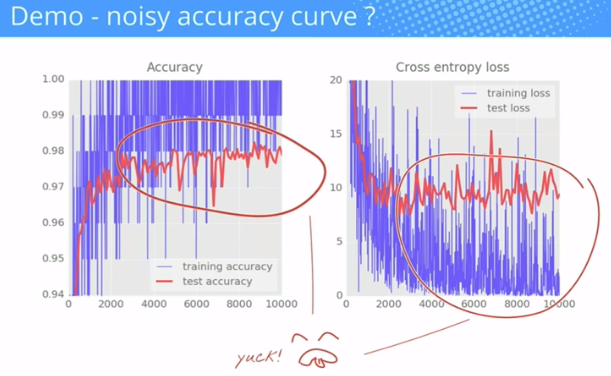

Accuracy
- Here we note how the training data accuracy has been jumping up and down. This means that the learning rate is too big!
  It isn't converging properly because the steps it has been taking are too big
  
Cross Entropy Loss
- Furthermore we see how the loss however minimized it jumps up and down conseqentially!

<h4> The solution to this is applying learning rate decay </h4>
- Note how we learned that learning rate decay means lowering the learning rate as the number of iterations increase
- Remember that we can change learning rate after each epoch as follows
  (1/ (1+decay_rate*epoch_number)) * initial learning rate. 
    <br>
Thus also making decay_rate another hyper-parameter to tune

<h2> Dropout  </h2>

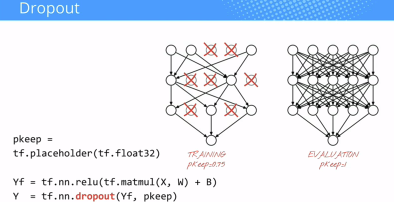

- We've learned the concept of dropout which for each iteration simply removes some of the nodes from the hidden layers!
- Recall the steps
    - for l in layers L-1:   
         - compute activation layer l like you would normally 
         - calculate probabilty of each node in that layer = create vector of the same where you zero out nodes with p < pkeep
         - multiply the vector to the activation layer l and move on         
- pkeep = 0.75 meaning that we remove any that are below the pkeep

- The reason we do this is so that the weights are further distributed and do not rely on particular nodes.
<br>
NOTE: dropout is only to be implementing during training! The whole point is to optimize the algorithm



<h4>Implementation in tensorflow (example) : </h4>
- pkeep = tf.placeholder(tf.float32)
- yf = tf.nn.relu(tf.matmul(X,W)+B)
- Y = tf.nn.dropout(Yf, pkeep)

In [20]:
#  Continue here: https://youtu.be/qyvlt7kiQoI?t=2222 (1:06:50)